In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
iris_data=pd.read_csv("Iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
iris_data.drop("Id",axis=1)
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


ANALYZING DATA

<AxesSubplot:xlabel='Species', ylabel='count'>

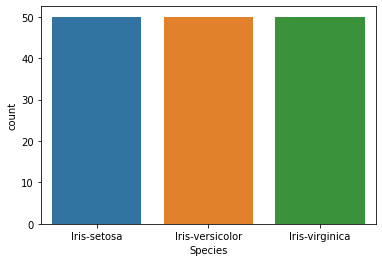

In [5]:
sns.countplot(x='Species',data=iris_data)

<AxesSubplot:ylabel='Frequency'>

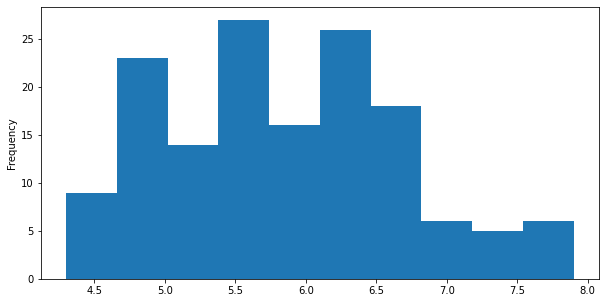

In [6]:
iris_data['SepalLengthCm'].plot.hist(bins=10,figsize=(10,5))

<AxesSubplot:ylabel='Frequency'>

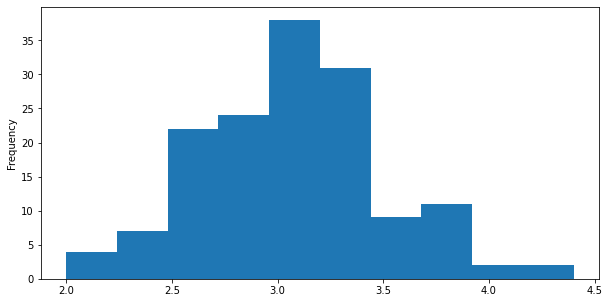

In [7]:
iris_data['SepalWidthCm'].plot.hist(bins=10,figsize=(10,5))

<AxesSubplot:ylabel='Frequency'>

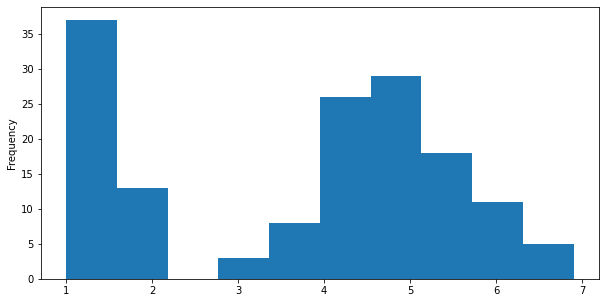

In [8]:
iris_data['PetalLengthCm'].plot.hist(bins=10,figsize=(10,5))

<AxesSubplot:ylabel='Frequency'>

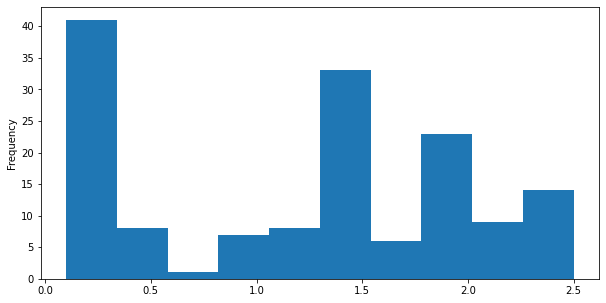

In [9]:
iris_data['PetalWidthCm'].plot.hist(bins=10,figsize=(10,5))

In petalLength and petalWidth there seems to be data points which are very small than others

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

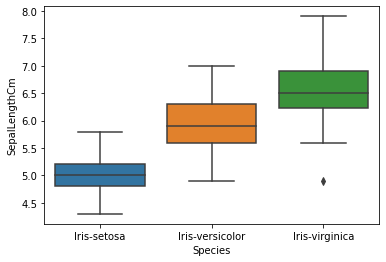

In [10]:
sns.boxplot(x="Species",y="SepalLengthCm",data=iris_data)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

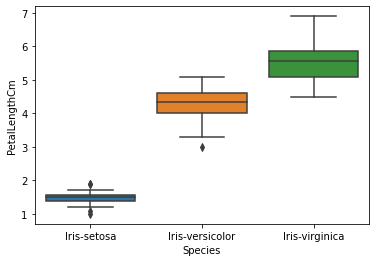

In [11]:
sns.boxplot(x="Species",y="PetalLengthCm",data=iris_data)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

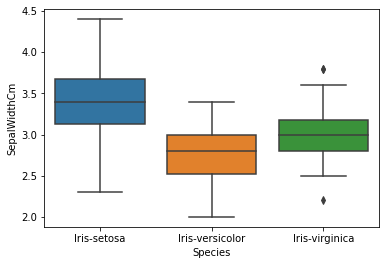

In [12]:
sns.boxplot(x="Species",y="SepalWidthCm",data=iris_data)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

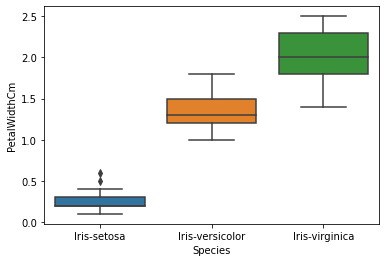

In [13]:
sns.boxplot(x="Species",y="PetalWidthCm",data=iris_data)

versicolor has less values when compared to virginica

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

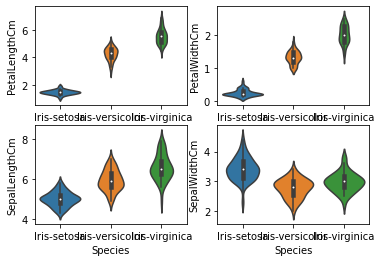

In [14]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
plt.subplot(2,2,1)
sns.violinplot(x="Species", y="PetalLengthCm", data=iris_data, size=6)
plt.subplot(2,2,2)
sns.violinplot(x="Species", y="PetalWidthCm", data=iris_data, size=6)
plt.subplot(2,2,3)
sns.violinplot(x="Species", y="SepalLengthCm", data=iris_data, size=6)
plt.subplot(2,2,4)
sns.violinplot(x="Species", y="SepalWidthCm", data=iris_data, size=6)


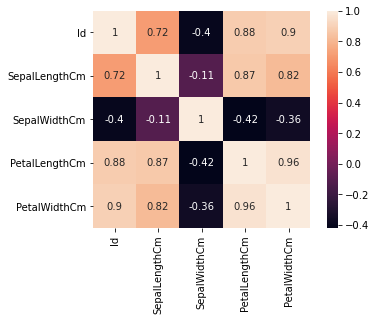

In [15]:
corrmat = iris_data.corr()
sns.heatmap(corrmat, annot = True, square = True);

petal measurements have highly positive correlation, while the sepal one are uncorrelated andthe petal features also have relatively high correlation with sepal_length, but not with sepal_width.

the given problem is a classification problem.we will be using KNN algorithm to build our model.

In [55]:
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.metrics import accuracy_score

In [56]:
X=iris_data.drop("Species",axis=1)
y=iris_data["Species"]


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [61]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of KNN is: ', accuracy_score(prediction, y_test))

The accuracy of KNN is:  0.9777777777777777
